# Part 4 - Modeling

In [1]:
# Load packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset

df = pd.read_csv('Part_3.csv')
pd.set_option("display.max_columns", None)
display(df.head())

,loan_status,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_score,fico_class,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verif_stat,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we
0,1,5000.0,36,10.65,162.87,2,10.0,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,76.0,0.0,737,1,0,0,0,0,1,3,2011,12,3,1,4,2,2
1,0,2500.0,60,15.27,59.83,3,0.0,30000.0,3,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,76.0,0.0,742,2,0,0,0,0,1,2,2011,12,2,4,3,2,1
2,1,2400.0,36,15.96,84.33,3,10.0,12252.0,4,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,76.0,0.0,737,1,0,0,0,0,1,1,2011,12,1,11,1,1,1
3,1,10000.0,36,13.49,339.31,3,10.0,49200.0,4,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,76.0,0.0,692,1,0,0,0,0,1,2,2011,12,2,2,4,2,2
4,1,3000.0,60,12.69,67.79,2,1.0,80000.0,4,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,76.0,0.0,697,1,0,0,0,0,1,2,2011,12,2,1,2,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              39786 non-null  int64  
 1   loan_amnt                39786 non-null  float64
 2   term                     39786 non-null  int64  
 3   int_rate                 39786 non-null  float64
 4   installment              39786 non-null  float64
 5   sub_grade                39786 non-null  int64  
 6   emp_length               39786 non-null  float64
 7   annual_inc               39786 non-null  float64
 8   purpose                  39786 non-null  int64  
 9   dti                      39786 non-null  float64
 10  delinq_2yrs              39786 non-null  float64
 11  inq_last_6mths           39786 non-null  float64
 12  open_acc                 39786 non-null  float64
 13  pub_rec                  39786 non-null  float64
 14  revol_bal             

In [4]:
# Checking nulls

round(100*(df.isnull().sum()/len(df.index)), 2)

loan_status                0.0
loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
sub_grade                  0.0
emp_length                 0.0
annual_inc                 0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
pub_rec_bankruptcies       0.0
fico_score                 0.0
fico_class                 0.0
home_ownership_MORTGAGE    0.0
home_ownership_NONE        0.0
home_ownership_OTHER       0.0
home_ownership_OWN         0.0
home_ownership_RENT        0.0
verif_stat                 0.0
year_issue                 0.0
month_issue                0.0
year_ecl                   0.0
month_ecl                  0.0
geo_loc                    0.0
geo_loc_ns                 0.0
geo_loc_

In [5]:
df.columns

Index(['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score',
       'fico_class', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verif_stat', 'year_issue', 'month_issue', 'year_ecl', 'month_ecl',
       'geo_loc', 'geo_loc_ns', 'geo_loc_we'],
      dtype='object')

In [6]:
df.shape

(39786, 33)

In [7]:
# z-score

from scipy import stats

z = np.abs(stats.zscore(df[['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score',
       'fico_class', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verif_stat', 'year_issue', 'month_issue',
       'year_ecl', 'month_ecl', 'geo_loc', 'geo_loc_ns', 'geo_loc_we']]))
print(z)
print()

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outliers - the index numbers and the corresponding column indices:')
print(np.where(z > 3))

       loan_status  loan_amnt      term  int_rate  installment  sub_grade  \
0         0.407673   0.834805  0.606139  0.369659     0.774762   0.417449   
1         2.452943   1.169726  1.649787  0.869805     1.267963   0.302911   
2         0.407673   1.183123  0.606139  1.054919     1.150694   0.302911   
3         0.407673   0.164963  0.606139  0.392262     0.069770   0.302911   
4         0.407673   1.102742  1.649787  0.177637     1.229863   0.417449   
...            ...        ...       ...       ...          ...        ...   
39781     0.407673   1.169726  0.606139  1.061827     1.178982   1.137809   
39782     0.407673   0.365916  0.606139  0.468923     0.236232   0.302911   
39783     0.407673   0.834805  0.606139  1.061827     0.803624   1.137809   
39784     0.407673   0.834805  0.606139  1.233527     0.810612   1.137809   
39785     0.407673   0.499884  0.606139  0.462016     0.331722   1.743631   

       emp_length  annual_inc   purpose       dti  delinq_2yrs  \
0        

In [8]:
# Removing outliers where z = 3

df = df[(z<3).all(axis=1)]
df.describe()

,loan_status,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_score,fico_class,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verif_stat,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we
count,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.0,29802.000000,29802.000000,29802.000000,29802.0,29802.000000,29802.000000,29802.000000,29802.0,29802.0,29802.0,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000,29802.000000
mean,0.864606,10793.510503,42.270183,11.795485,312.823267,2.483021,4.831521,64280.926257,1.892994,13.584100,0.084223,0.824072,9.169854,0.0,12252.293269,50.901750,75.981008,0.0,716.604725,1.191967,0.454365,0.0,0.0,0.0,0.545635,1.883062,2010.355916,7.170962,1.731193,6.918261,2.298738,1.458862,1.381015
std,0.342149,6661.185022,10.543857,3.587301,187.595079,1.307313,3.512044,33978.512316,1.262763,6.542277,0.277726,0.989536,4.026098,0.0,10854.739737,26.954615,0.744391,0.0,33.658874,0.541514,0.497921,0.0,0.0,0.0,0.497921,0.852724,0.828825,3.403277,0.714966,3.534900,1.304736,0.498313,0.485644
min,0.000000,500.000000,36.000000,5.420000,16.250000,1.000000,0.000000,4000.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,43.000000,0.0,662.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,5500.000000,36.000000,8.900000,167.730000,1.000000,2.000000,40100.000000,1.000000,8.550000,0.000000,0.000000,6.000000,0.0,4293.000000,28.800000,76.000000,0.0,687.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,2010.000000,4.000000,1.000000,4.000000,1.000000,1.000000,1.000000
50%,1.000000,10000.000000,36.000000,11.710000,278.585000,2.000000,4.000000,57398.000000,1.000000,13.670000,0.000000,1.000000,9.000000,0.0,9243.000000,51.300000,76.000000,0.0,712.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,2.000000,2011.000000,7.000000,2.000000,7.000000,2.000000,1.000000,1.000000
75%,1.000000,15000.000000,60.000000,14.270000,414.350000,3.000000,8.000000,80000.000000,3.000000,18.730000,0.000000,1.000000,12.000000,0.0,16856.750000,73.200000,76.000000,0.0,742.000000,2.000000,1.000000,0.0,0.0,0.0,1.000000,3.000000,2011.000000,10.000000,2.000000,10.000000,4.000000,2.000000,2.000000
max,1.000000,33600.000000,60.000000,22.940000,946.890000,6.000000,10.000000,260000.000000,4.000000,29.990000,1.000000,4.000000,22.000000,0.0,59561.000000,99.900000,76.000000,0.0,797.000000,2.000000,1.000000,0.0,0.0,0.0,1.000000,3.000000,2011.000000,12.000000,4.000000,12.000000,4.000000,2.000000,2.000000


In [9]:
# Columns where the values are unique

print('home_ownership_NONE:\n', df.home_ownership_NONE.value_counts())
print('home_ownership_OTHER:\n', df.home_ownership_OTHER.value_counts())
print('home_ownership_OWN:\n', df.home_ownership_OWN.value_counts())
print('pub_rec:\n', df.pub_rec.value_counts())
print('pub_rec_bankruptcies:\n', df.pub_rec_bankruptcies.value_counts())

home_ownership_NONE:
 0    29802
Name: home_ownership_NONE, dtype: int64
home_ownership_OTHER:
 0    29802
Name: home_ownership_OTHER, dtype: int64
home_ownership_OWN:
 0    29802
Name: home_ownership_OWN, dtype: int64
pub_rec:
 0.0    29802
Name: pub_rec, dtype: int64
pub_rec_bankruptcies:
 0.0    29802
Name: pub_rec_bankruptcies, dtype: int64


Variables home_ownership_NONE, home_ownership_OTHER, home_ownership_OWN, pub_rec and pub_rec_bankruptcies have a mean of 0 and contain only one unique value. Therefore, they are removed.

In [10]:
# Removing unnecessary columns

df = df.drop(['home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'pub_rec', 'pub_rec_bankruptcies'], axis=1)

In [11]:
# Save a new Data Frame

df.to_csv('Part_4.csv', index=False)

In [12]:
# Copy of the Data Frame (one of them will be used for clustering)

df_outliers_removed = df

In [13]:
# Data Frames shape after deleting outliers

df_outliers_removed.shape

(29802, 28)

### Clustering: KMeans
#### Justifying methods: Silhouette score, Elbow-curve method

In [14]:
# Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=5)

In [16]:
kmeans.labels_

array([4, 4, 1, ..., 0, 4, 0])

In [17]:
# Silhouette score

range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_outliers_removed)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_outliers_removed, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5433673045453465
For n_clusters=3, the silhouette score is 0.4467370559413464
For n_clusters=4, the silhouette score is 0.3949133721024852
For n_clusters=5, the silhouette score is 0.3538204345208961


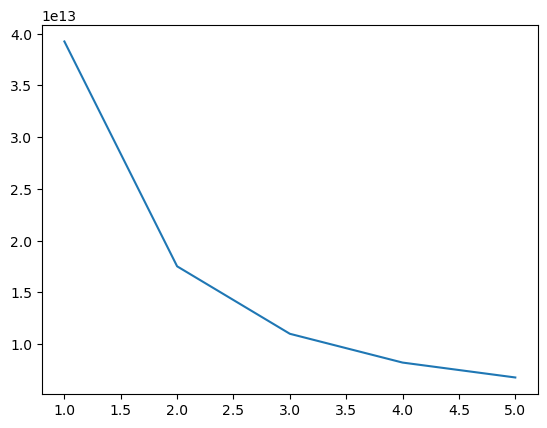

In [18]:
# Elbow-curve method

ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_outliers_removed)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

In [19]:
# n_clusters = 3

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=3, random_state=42)

In [20]:
kmeans.labels_

array([0, 0, 0, ..., 2, 0, 2])

In [21]:
df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

In [22]:
df_outliers_removed['K-Means_Cluster_ID'].value_counts()

0    16227
2    10960
1     2615
Name: K-Means_Cluster_ID, dtype: int64

In [23]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_status'].value_counts()

K-Means_Cluster_ID  loan_status
0                   1              13712
                    0               2515
1                   1               2356
                    0                259
2                   1               9699
                    0               1261
Name: loan_status, dtype: int64

In [24]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
K-Means_Cluster_ID,,,,,,,,
0,16227.0,8603.491095,5296.494760,500.0,4800.0,7500.0,12000.0,32000.0
1,2615.0,15354.235182,7589.688734,1000.0,9600.0,15000.0,21000.0,33600.0
2,10960.0,12947.812500,6976.980424,1000.0,7200.0,12000.0,18000.0,33600.0


In [25]:
# n_clusters = 2

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=2, random_state=42)

In [26]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

In [28]:
df_outliers_removed['K-Means_Cluster_ID'].value_counts()

0    22582
1     7220
Name: K-Means_Cluster_ID, dtype: int64

In [29]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_status'].value_counts()

K-Means_Cluster_ID  loan_status
0                   1              19273
                    0               3309
1                   1               6494
                    0                726
Name: loan_status, dtype: int64

In [30]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
K-Means_Cluster_ID,,,,,,,,
0,22582.0,9638.458728,5972.755382,500.0,5000.0,8375.0,13000.0,33425.0
1,7220.0,14406.166898,7372.722951,1000.0,8100.0,14000.0,20000.0,33600.0


Regardless of the separation of 2 or 3 clusters, there is no clear division into the loan_status column: Fully Paid and Charged Off. Most selected clusters are poorly separated except annual income.

In [36]:
# Dropping an additional column after clustering.

df = df.drop('K-Means_Cluster_ID', axis=1)

## Training models

In [37]:
df.loan_status.value_counts()

1    25767
0     4035
Name: loan_status, dtype: int64

In [38]:
# Loading train_test_split

from sklearn.model_selection import train_test_split

In [39]:
# Spliting data into X and y and checking the shape

X = df.drop('loan_status', axis=1)
y = df['loan_status'].values

print(X.shape)
print(y.shape)

(29802, 27)
(29802,)


In [40]:
# Data splitting into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
# Checking the size of the data split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20861, 27)
(8941, 27)
(20861,)
(8941,)


In [42]:
# Importing metrics and classification report

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [43]:
# Function using ti create a classification reports

def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True, zero_division=1)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
dt_prediction = dtree.predict(X_test)

In [48]:
print(classification_report(y_test, dt_prediction, zero_division=1))

dtree_pr= evaluate(dt_prediction,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.17      0.19      0.18      1223
           1       0.87      0.85      0.86      7718

    accuracy                           0.76      8941
   macro avg       0.52      0.52      0.52      8941
weighted avg       0.77      0.76      0.77      8941



{'f1-score': 0.86, 'accuracy': 0.76}

In [49]:
# Calculating the number of predicted 0s and 1s

dtree_count = np.unique(dt_prediction, return_counts=True)
dtree_count

(array([0, 1], dtype=int64), array([1386, 7555], dtype=int64))

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
rf_prediction = rf.predict(X_test)

In [52]:
print(classification_report(y_test, rf_prediction, zero_division=1))
rf_pr = evaluate(rf_prediction,y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.25      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.56      0.50      0.47      8941
weighted avg       0.78      0.86      0.80      8941

{'f1-score': 0.93, 'accuracy': 0.86}


In [53]:
rf_count = np.unique(rf_prediction, return_counts=True)
rf_count

(array([0, 1], dtype=int64), array([  12, 8929], dtype=int64))

In [54]:
# Data standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('loan_status',axis=1))
scaled_data = scaler.transform(df.drop('loan_status' ,axis=1))
df_scaled = pd.DataFrame(scaled_data,columns=df.drop('loan_status',axis=1).columns)
df_scaled.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_score,fico_class,home_ownership_MORTGAGE,home_ownership_RENT,verif_stat,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we
0,-0.869756,-0.594686,-0.319322,-0.799359,-0.369483,1.471669,-1.185502,-0.707187,2.150037,-0.303263,0.177791,-1.532491,0.128583,1.216816,0.025514,0.605951,-0.354507,-0.91254,0.91254,1.309869,0.777119,1.418962,1.774669,-1.674265,1.303934,1.085958,1.274586
1,-1.260084,-0.594686,1.160924,-1.218034,0.395458,1.471669,-1.531256,1.668597,-0.743500,-0.303263,1.188382,-1.780874,-0.856441,1.765896,0.025514,0.605951,-0.354507,-0.91254,0.91254,-1.035594,0.777119,1.418962,-1.022712,1.154717,-0.995420,-0.920846,-0.784568
2,-0.119127,-0.594686,0.472373,0.141193,0.395458,1.471669,-0.443845,1.668597,0.980700,-0.303263,0.177791,0.206195,-0.613041,-1.109356,0.025514,-0.731015,-0.354507,-0.91254,0.91254,0.137137,0.777119,1.418962,0.375978,-1.391367,1.303934,1.085958,1.274586
3,-1.170008,1.681559,0.249360,-1.306204,-0.369483,-1.090984,0.462626,1.668597,0.665819,-0.303263,-0.832800,1.448113,1.430801,0.111235,0.025514,-0.582463,-0.354507,-0.91254,0.91254,0.137137,0.777119,1.418962,0.375978,-1.674265,-0.228968,-0.920846,1.274586
4,-0.869756,-0.594686,-1.085928,-0.833529,-1.134423,-0.521506,-0.832332,1.668597,-0.364420,-0.303263,2.198974,-0.042189,-0.395161,-0.838525,0.025514,0.457399,-0.354507,-0.91254,0.91254,0.137137,0.777119,1.418962,-1.022712,1.154717,1.303934,1.085958,1.274586


In [55]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_data, df['loan_status'],
                                                    test_size=0.30, random_state = 42)

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_scaled_train, y_scaled_train)

LogisticRegression()

In [57]:
lr_prediction = lr.predict(X_scaled_test)

In [58]:
print(classification_report(y_scaled_test, lr_prediction, zero_division=1))
lr_pr = evaluate(lr_prediction,y_scaled_test)
print(lr_pr)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.93      0.50      0.46      8941
weighted avg       0.88      0.86      0.80      8941

{'f1-score': 0.93, 'accuracy': 0.86}


In [59]:
lr_count = np.unique(lr_prediction, return_counts=True)
lr_count

(array([0, 1], dtype=int64), array([   2, 8939], dtype=int64))

### Naïve Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_scaled_train, y_scaled_train)

GaussianNB()

In [61]:
nb_prediction = nb.predict(X_scaled_test)

In [62]:
print(classification_report(y_scaled_test, nb_prediction, zero_division=1))
nb_pr = evaluate(nb_prediction,y_scaled_test)
print(nb_pr)

              precision    recall  f1-score   support

           0       0.25      0.31      0.27      1223
           1       0.89      0.85      0.87      7718

    accuracy                           0.78      8941
   macro avg       0.57      0.58      0.57      8941
weighted avg       0.80      0.78      0.79      8941

{'f1-score': 0.87, 'accuracy': 0.78}


In [63]:
nb_count = np.unique(nb_prediction, return_counts=True)
nb_count

(array([0, 1], dtype=int64), array([1500, 7441], dtype=int64))

### Support Vector Machine (SVM)

In [64]:
from sklearn.svm import SVC

In [65]:
model = SVC()

In [66]:
model.fit(X_scaled_train, y_scaled_train)

SVC()

In [67]:
svm_prediction = model.predict(X_scaled_test)

In [68]:
print(classification_report(y_scaled_test, svm_prediction, zero_division=1))
svm_pr = evaluate(svm_prediction,y_scaled_test)
svm_pr

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.93      0.50      0.46      8941
weighted avg       0.88      0.86      0.80      8941



{'f1-score': 0.93, 'accuracy': 0.86}

In [69]:
svm_count = np.unique(svm_prediction, return_counts=True)
svm_count

(array([1], dtype=int64), array([8941], dtype=int64))

### K-Nearest Neighbors (KNN)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [71]:
knn.fit(X_scaled_train,y_scaled_train)

KNeighborsClassifier(n_neighbors=2)

In [72]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [73]:
knn_prediction = knn.predict(X_scaled_test)

In [74]:
print(classification_report(knn_prediction, y_scaled_test, zero_division=1))
knn_pr = evaluate(knn_prediction,y_scaled_test)
knn_pr

              precision    recall  f1-score   support

           0       0.30      0.18      0.23      2000
           1       0.79      0.88      0.83      6941

    accuracy                           0.72      8941
   macro avg       0.55      0.53      0.53      8941
weighted avg       0.68      0.72      0.70      8941



{'f1-score': 0.83, 'accuracy': 0.72}

In [75]:
knn_count = np.unique(knn_prediction, return_counts=True)
knn_count

(array([0, 1], dtype=int64), array([2000, 6941], dtype=int64))

In [76]:
prediction_data={'Model': ['Decision Tree',
                          'Random Forest',
                          'Logistic Regression',
                          'Naive Bayes',
                          'SVM',
                          'KNN'
                         ],
                   'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              svm_pr['f1-score'],
                              knn_pr['f1-score']],
                 
                   'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              svm_pr['accuracy'],
                              knn_pr['accuracy']],
                 
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table

,Model,F1-score,Accuracy
0,Decision Tree,0.86,0.76
1,Random Forest,0.93,0.86
2,Logistic Regression,0.93,0.86
3,Naive Bayes,0.87,0.78
4,SVM,0.93,0.86
5,KNN,0.83,0.72


In [77]:
prediction_counts = {'Model': ['Decision Tree',
                              'Random Forest',
                              'Logistic Regression',
                              'Naive Bayes',
                              'SVM',
                              'KNN'
                              ],
                     
                    'Balnce [0 : 1]': [dtree_count[1],
                              rf_count[1],
                              lr_count[1],
                              nb_count[1],
                              svm_count[1],
                              knn_count[1]]
                    }

counts_table = pd.DataFrame(prediction_counts)
counts_table

,Model,Balnce [0 : 1]
0,Decision Tree,"[1386, 7555]"
1,Random Forest,"[12, 8929]"
2,Logistic Regression,"[2, 8939]"
3,Naive Bayes,"[1500, 7441]"
4,SVM,[8941]
5,KNN,"[2000, 6941]"


The three models: Random Forest, Logistic Regression and SVM have the same high accuracy and f1_score but the answers are unbalanced (no negative answers for SVM and only a few negative answers for Random Forest and Logistic Regression). The models: Decision Tree Classifier, Naive Bayes and K Nearest Neighbors are characterized by better balanced data.

## Data compression by PCA

In [78]:
X_scaled = scaler.fit_transform(X)

In [79]:
X_scaled[:4, :4]

array([[-0.86975631, -0.59468638, -0.3193221 , -0.79935883],
       [-1.2600838 , -0.59468638,  1.16092431, -1.21803355],
       [-0.11912652, -0.59468638,  0.47237278,  0.14119335],
       [-1.17000822,  1.68155861,  0.24936014, -1.30620365]])

In [80]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_score,fico_class,home_ownership_MORTGAGE,home_ownership_RENT,verif_stat,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we
0,-0.869756,-0.594686,-0.319322,-0.799359,-0.369483,1.471669,-1.185502,-0.707187,2.150037,-0.303263,0.177791,-1.532491,0.128583,1.216816,0.025514,0.605951,-0.354507,-0.91254,0.91254,1.309869,0.777119,1.418962,1.774669,-1.674265,1.303934,1.085958,1.274586
1,-1.260084,-0.594686,1.160924,-1.218034,0.395458,1.471669,-1.531256,1.668597,-0.743500,-0.303263,1.188382,-1.780874,-0.856441,1.765896,0.025514,0.605951,-0.354507,-0.91254,0.91254,-1.035594,0.777119,1.418962,-1.022712,1.154717,-0.995420,-0.920846,-0.784568
2,-0.119127,-0.594686,0.472373,0.141193,0.395458,1.471669,-0.443845,1.668597,0.980700,-0.303263,0.177791,0.206195,-0.613041,-1.109356,0.025514,-0.731015,-0.354507,-0.91254,0.91254,0.137137,0.777119,1.418962,0.375978,-1.391367,1.303934,1.085958,1.274586
3,-1.170008,1.681559,0.249360,-1.306204,-0.369483,-1.090984,0.462626,1.668597,0.665819,-0.303263,-0.832800,1.448113,1.430801,0.111235,0.025514,-0.582463,-0.354507,-0.91254,0.91254,0.137137,0.777119,1.418962,0.375978,-1.674265,-0.228968,-0.920846,1.274586
4,-0.869756,-0.594686,-1.085928,-0.833529,-1.134423,-0.521506,-0.832332,1.668597,-0.364420,-0.303263,2.198974,-0.042189,-0.395161,-0.838525,0.025514,0.457399,-0.354507,-0.91254,0.91254,0.137137,0.777119,1.418962,-1.022712,1.154717,1.303934,1.085958,1.274586


<AxesSubplot:>

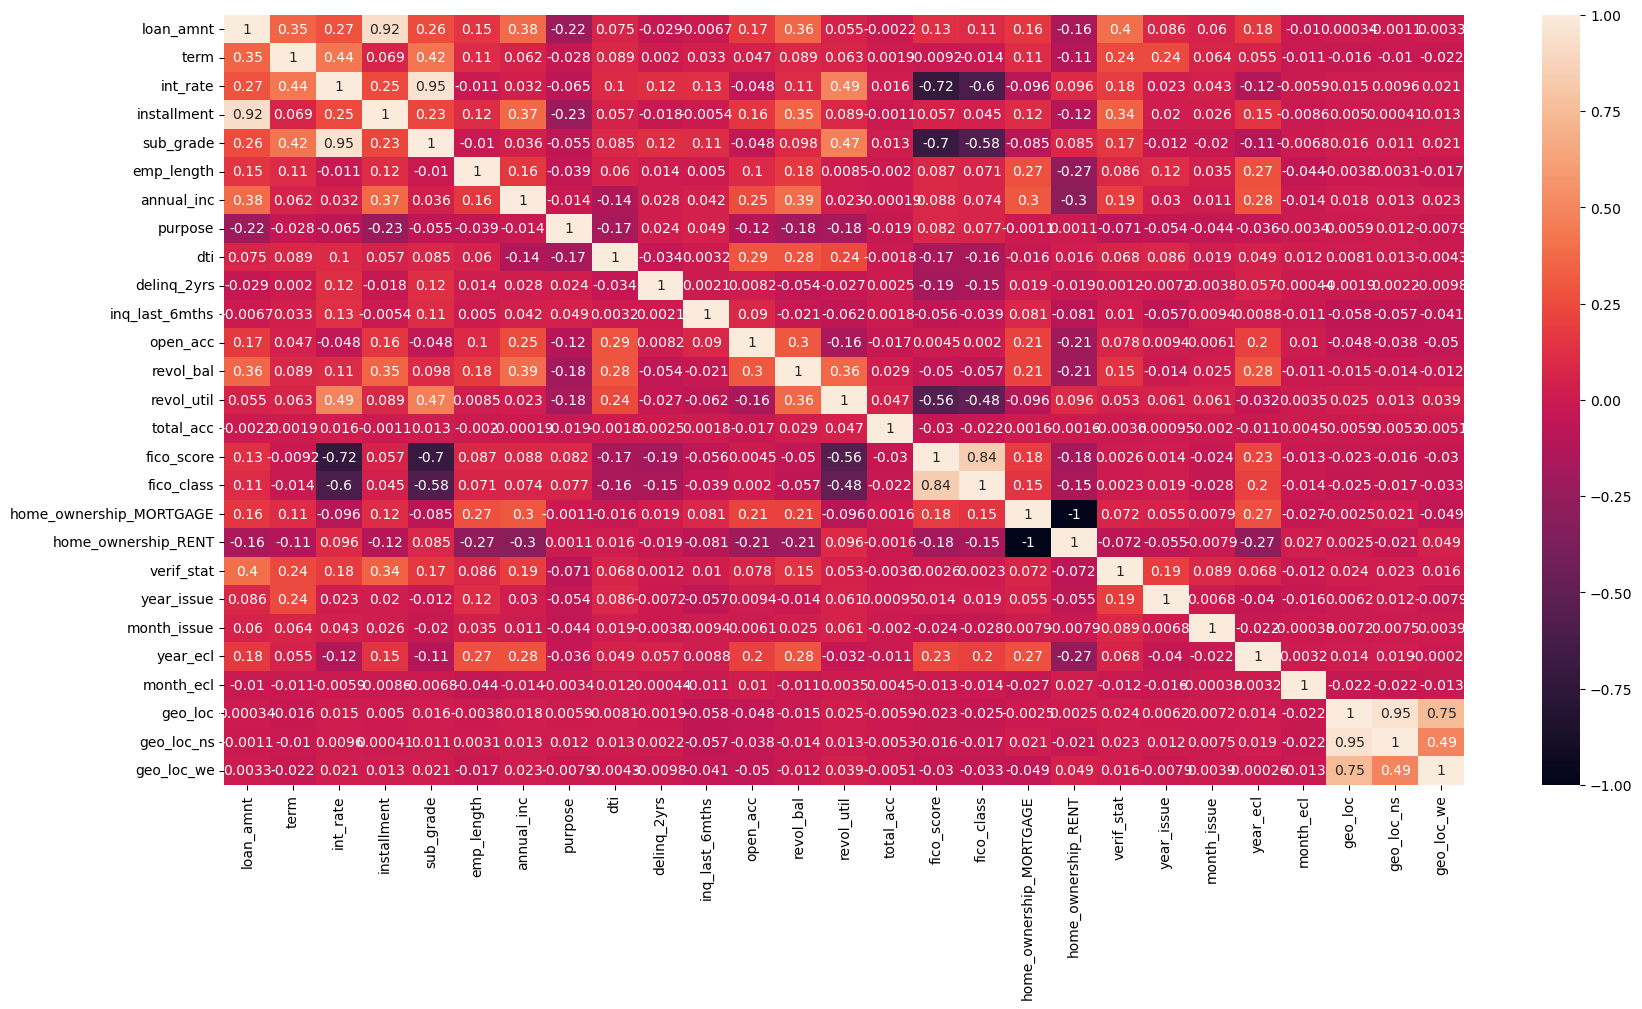

In [81]:
# Heatmap

plt.figure(figsize = (20,10))
sns.heatmap(X_scaled_df.corr(), annot=True)

In [82]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [83]:
pca.components_[0]

array([ 1.77495549e-01,  1.84298755e-01,  4.57346371e-01,  1.72607945e-01,
        4.45155218e-01,  6.00072677e-03,  4.92281253e-02, -1.07347514e-01,
        1.33727666e-01,  6.87168545e-02,  3.68241569e-02,  1.72284419e-02,
        1.51050952e-01,  3.34165230e-01,  1.81612437e-02, -3.98473213e-01,
       -3.64187427e-01, -6.19058863e-02,  6.19058863e-02,  1.33499132e-01,
        3.78250402e-02,  3.45081117e-02, -5.31377943e-02, -3.33705087e-04,
        2.66201329e-02,  2.03509422e-02,  2.97542191e-02])

In [84]:
# Percentage of variance explained by each of the selected components.

pca.explained_variance_ratio_

array([1.47405781e-01, 1.32015565e-01, 9.18502460e-02, 6.64892149e-02,
       5.78422262e-02, 4.89328863e-02, 4.18392360e-02, 3.87425967e-02,
       3.74066717e-02, 3.72025516e-02, 3.65908796e-02, 3.58968658e-02,
       3.30340264e-02, 3.12064491e-02, 2.77919437e-02, 2.73244370e-02,
       2.49078286e-02, 2.09517073e-02, 1.93548267e-02, 1.52749781e-02,
       1.15849749e-02, 9.74302382e-03, 3.84277703e-03, 1.74317035e-03,
       1.02513609e-03, 2.90706644e-32, 1.14411243e-32])

In [85]:
# Cumulative sum of elements

var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.14740578, 0.27942135, 0.37127159, 0.43776081, 0.49560303,
       0.54453592, 0.58637516, 0.62511775, 0.66252442, 0.69972698,
       0.73631786, 0.77221472, 0.80524875, 0.8364552 , 0.86424714,
       0.89157158, 0.91647941, 0.93743111, 0.95678594, 0.97206092,
       0.98364589, 0.99338892, 0.99723169, 0.99897486, 1.        ,
       1.        , 1.        ])

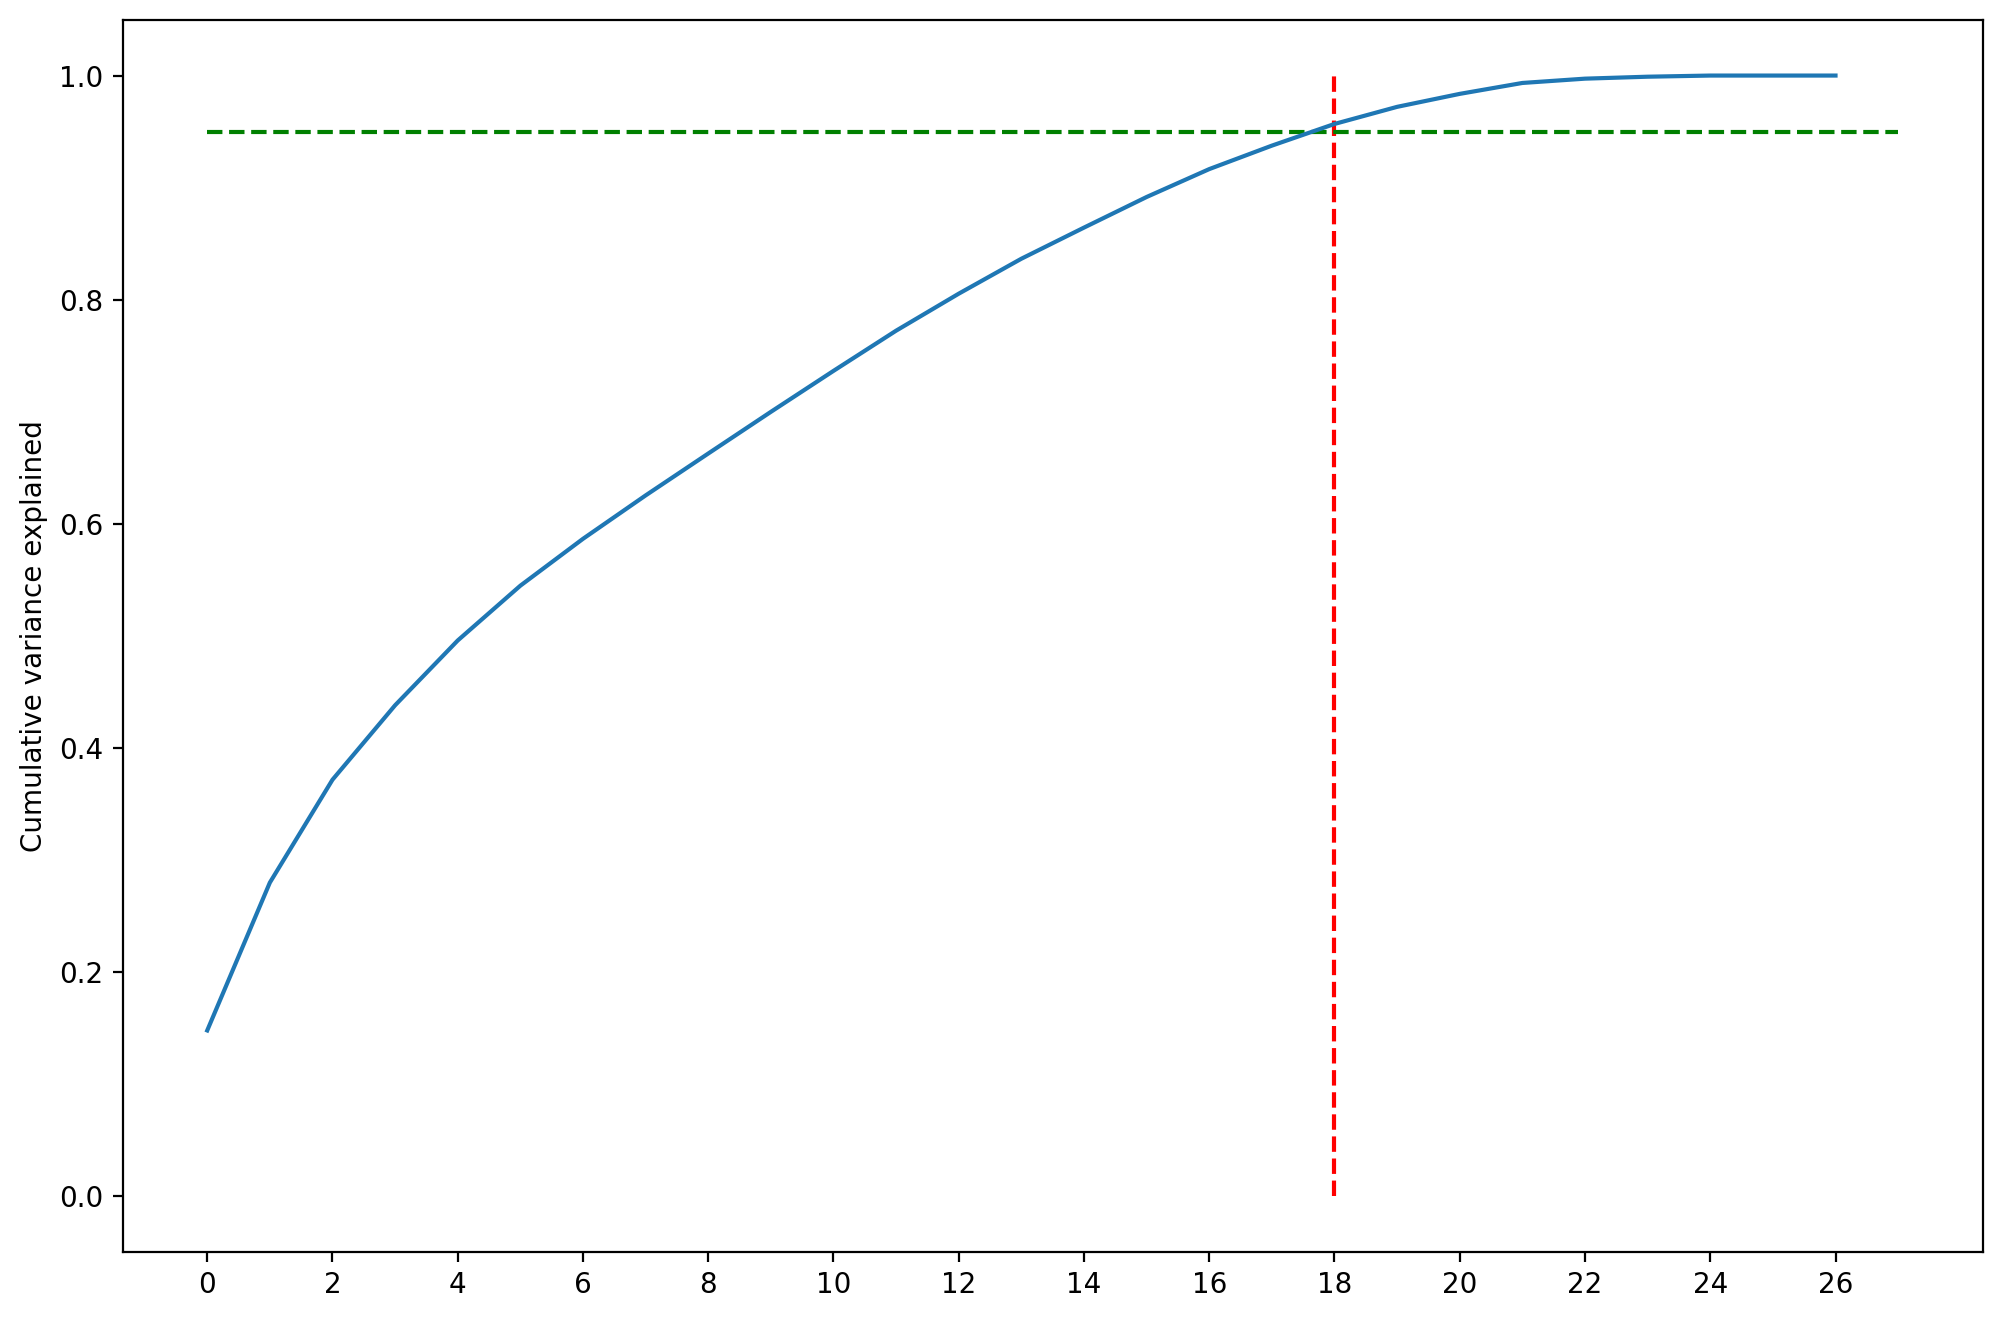

In [86]:
# Ploting the best number of PCA components

fig = plt.figure(figsize=[12,8], dpi=200)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26])
plt.vlines(x=18, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.95, xmax = 27, xmin=0, colors='g', linestyles='--')
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [87]:
# Data compression to 18 variables

pca_final = PCA(n_components=18)
X_pca_final = pca_final.fit_transform(X_scaled) 

In [88]:
print(X.shape)
print(X_pca_final.shape)

(29802, 27)
(29802, 18)


In [89]:
corrmat = np.corrcoef(X_pca_final.transpose())
corrmat.shape

(18, 18)

<AxesSubplot:>

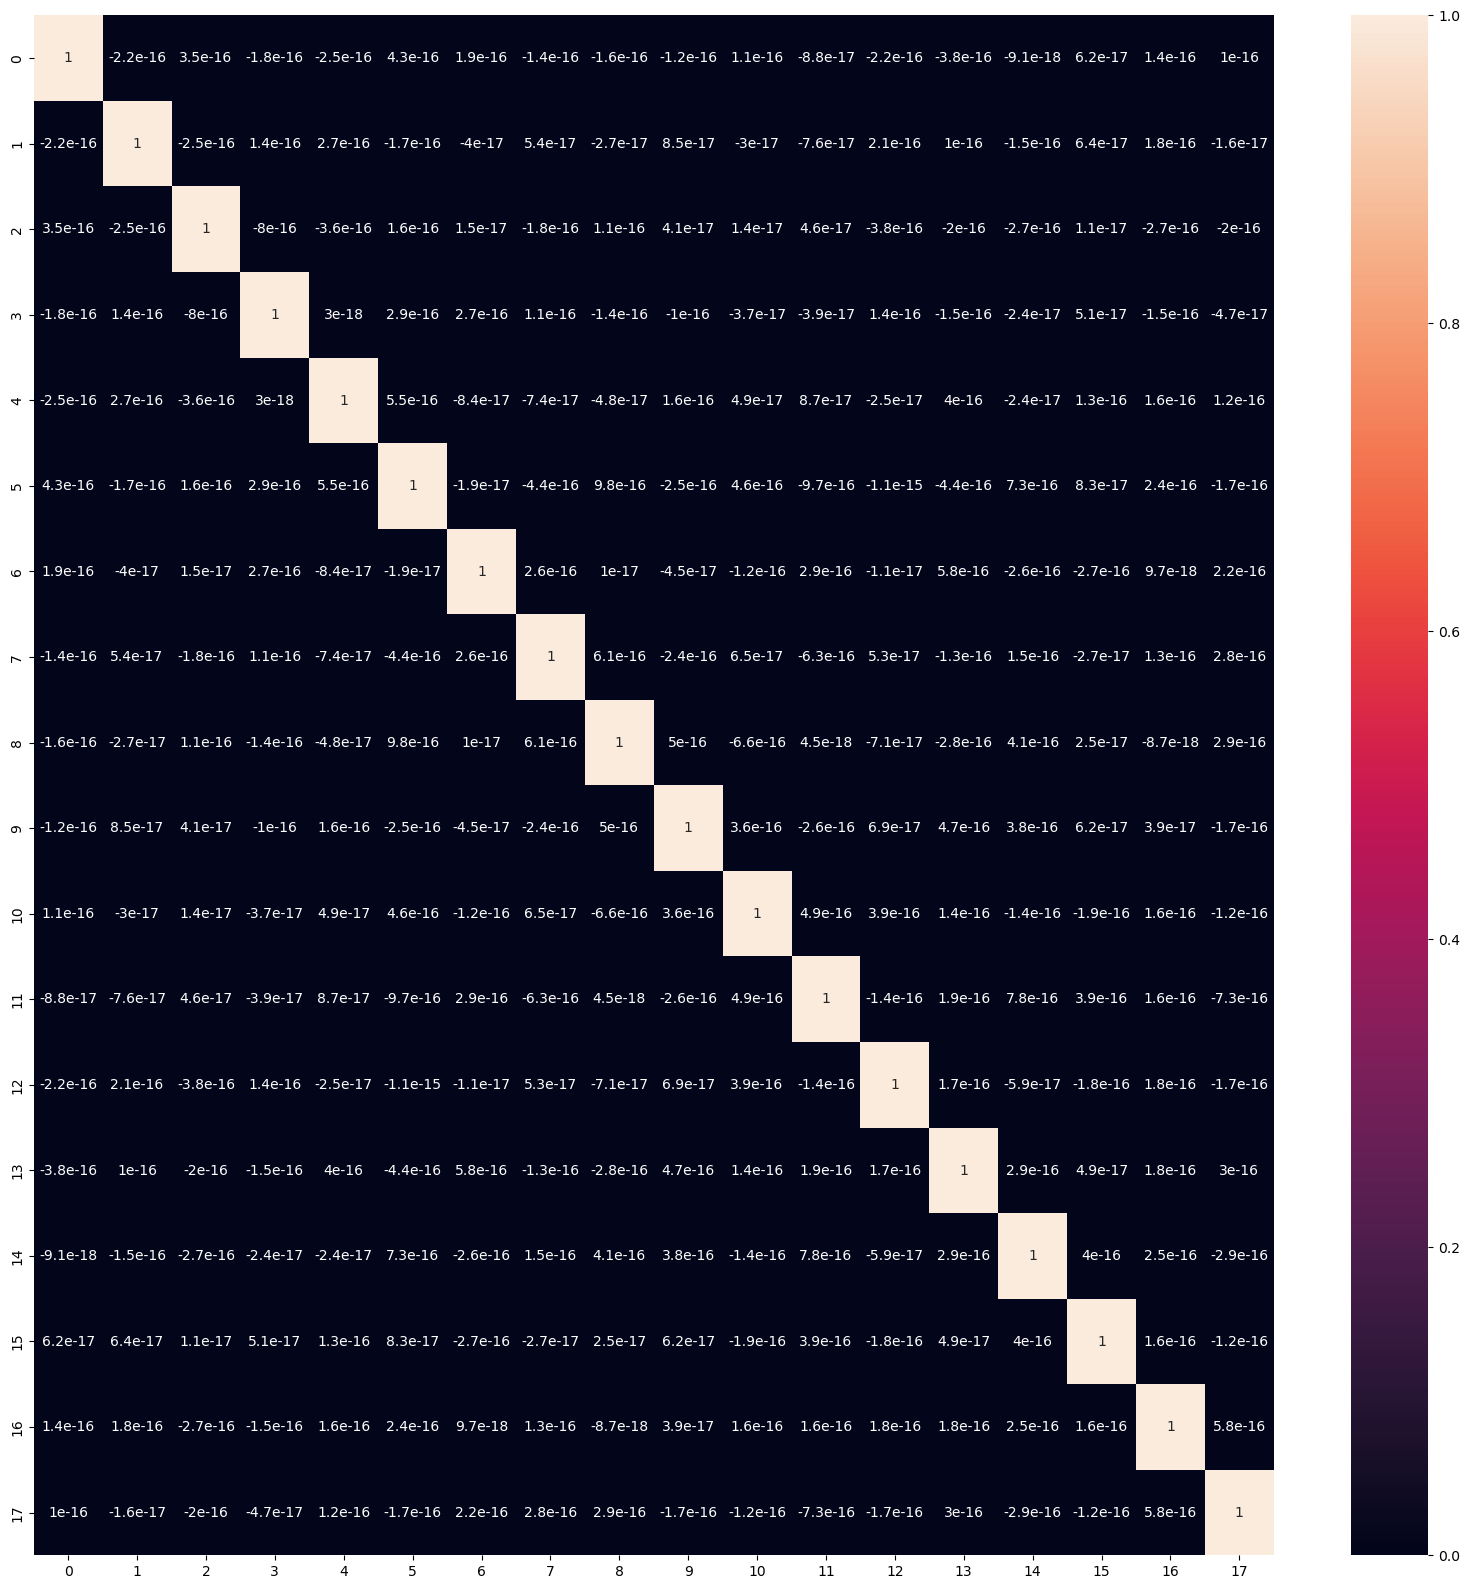

In [90]:
# Heatmap after PCA

plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

In [91]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2], 
                       'PC4': pca.components_[3], 'PC5': pca.components_[4], 'PC6': pca.components_[5], 
                       'PC7': pca.components_[6], 'PC8': pca.components_[7], 'PC9': pca.components_[8],
                       'PC10': pca.components_[9], 'PC11': pca.components_[10], 'PC12': pca.components_[11],
                       'PC13': pca.components_[12], 'PC14': pca.components_[13], 'PC15': pca.components_[14],
                       'PC16': pca.components_[15], 'PC17': pca.components_[16], 'PC18': pca.components_[17],
                       'Features': colnames})
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,Features
0,0.177496,0.367332,0.013074,0.378219,0.095517,0.112215,0.017769,-0.038323,-0.005320,-0.021522,0.001926,0.099722,-0.120459,-0.049390,-0.100073,-0.039639,-0.215911,-0.118066,loan_amnt
1,0.184299,0.139804,-0.024450,0.061520,0.369269,-0.382799,0.139444,0.019972,-0.143326,-0.052277,0.016803,-0.200691,-0.190889,-0.322848,0.346066,0.011871,0.003557,0.259865,term
2,0.457346,-0.038071,-0.026461,-0.035391,0.208698,0.038954,0.047936,-0.031146,-0.057452,0.005491,0.027643,-0.056459,-0.094031,-0.070305,0.034605,-0.062823,0.007512,-0.061089,int_rate
3,0.172608,0.328272,0.017411,0.369514,-0.003860,0.255338,-0.024183,-0.044388,0.019432,-0.006752,-0.000465,0.178748,-0.067266,0.060488,-0.217631,-0.064931,-0.242128,-0.232967,installment
4,0.445155,-0.038243,-0.025003,-0.045811,0.213639,0.067277,0.046072,-0.012940,-0.114660,-0.002609,0.038017,-0.044656,-0.114352,-0.090756,0.026319,-0.067967,0.038615,-0.043859,sub_grade
5,0.006001,0.219027,0.006231,-0.162043,0.004391,-0.185364,-0.176086,0.246776,-0.014155,0.159003,-0.040232,-0.313295,-0.278587,0.392936,-0.337362,-0.511191,-0.037220,0.250078,emp_length
6,0.049228,0.318856,0.030036,-0.016871,0.014408,0.318586,-0.091433,0.085532,0.020421,0.010820,-0.001398,-0.105412,0.435208,0.101566,0.343905,-0.125150,0.003941,0.196644,annual_inc
7,-0.107348,-0.095668,0.005234,-0.148396,0.319435,0.126246,0.068336,0.088161,-0.144298,0.040841,0.055257,-0.431373,0.465764,-0.297567,-0.416408,0.006423,-0.314534,-0.134802,purpose
8,0.133728,0.050689,-0.012146,-0.031480,-0.448251,-0.387232,0.306315,0.004310,-0.075926,0.001679,-0.029503,-0.003342,-0.074858,-0.176676,-0.333168,0.193320,-0.211705,-0.002839,dti
9,0.068717,-0.026028,-0.011189,-0.162369,0.117882,0.177897,0.089597,0.674940,0.321948,-0.079261,-0.266234,0.211674,-0.130051,-0.038363,-0.008708,0.309616,-0.243718,0.218126,delinq_2yrs


In [92]:
pca_df.shape

(27, 19)

## Training models after PCA

In [93]:
X = X_pca_final
y = df.loan_status

print(X.shape)
print(y.shape)

(29802, 18)
(29802,)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Decision Tree

In [95]:
dtree_pca = DecisionTreeClassifier()
dtree_pca.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
dtree_pca_pred = dtree_pca.predict(X_test)

In [97]:
print(classification_report(y_test, dtree_pca_pred, zero_division=1))

dtree_pca_pr = evaluate(dtree_pca_pred,y_test)
dtree_pca_pr

              precision    recall  f1-score   support

           0       0.18      0.21      0.20      1223
           1       0.87      0.85      0.86      7718

    accuracy                           0.76      8941
   macro avg       0.53      0.53      0.53      8941
weighted avg       0.78      0.76      0.77      8941



{'f1-score': 0.86, 'accuracy': 0.76}

In [98]:
dtree_pca_count = np.unique(dtree_pca_pred, return_counts=True)
dtree_pca_count

(array([0, 1], dtype=int64), array([1417, 7524], dtype=int64))

### Random Forest

In [99]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
rf_pca_pred = rf_pca.predict(X_test)

In [101]:
print(classification_report(y_test, rf_pca_pred, zero_division=1))

rf_pca_pr = evaluate(rf_pca_pred, y_test)
rf_pca_pr

              precision    recall  f1-score   support

           0       0.67      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.77      0.50      0.46      8941
weighted avg       0.84      0.86      0.80      8941



{'f1-score': 0.93, 'accuracy': 0.86}

In [102]:
rf_pca_count = np.unique(rf_pca_pred, return_counts=True)
rf_pca_count

(array([0, 1], dtype=int64), array([   3, 8938], dtype=int64))

### Logistic Regression

In [103]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train, y_train)

LogisticRegression()

In [104]:
lr_pca_pred = lr_pca.predict(X_test)

In [105]:
print(classification_report(y_test, lr_pca_pred, zero_division=1))

lr_pca_pr = evaluate(lr_pca_pred, y_test)
lr_pca_pr

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.93      0.50      0.46      8941
weighted avg       0.88      0.86      0.80      8941



{'f1-score': 0.93, 'accuracy': 0.86}

In [106]:
lr_pca_count = np.unique(lr_pca_pred, return_counts=True)
lr_pca_count

(array([0, 1], dtype=int64), array([   1, 8940], dtype=int64))

### Naïve Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB
nb_pca = GaussianNB()
nb_pca.fit(X_train, y_train)

GaussianNB()

In [108]:
nb_pca_pred = nb_pca.predict(X_test)

In [109]:
print(classification_report(y_test, nb_pca_pred, zero_division=1))

nb_pca_pr = evaluate(nb_pca_pred, y_test)
nb_pca_pr

              precision    recall  f1-score   support

           0       0.29      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.57      0.50      0.46      8941
weighted avg       0.78      0.86      0.80      8941



{'f1-score': 0.93, 'accuracy': 0.86}

In [110]:
nb_pca_count = np.unique(nb_pca_pred, return_counts=True)
nb_pca_count

(array([0, 1], dtype=int64), array([   7, 8934], dtype=int64))

### Support Vector Machine (SVM)

In [111]:
svm_pca = SVC()
svm_pca.fit(X_train, y_train)

SVC()

In [112]:
svm_pca_pred = svm_pca.predict(X_test)

In [113]:
print(classification_report(y_test, svm_pca_pred, zero_division=1))

svm_pca_pr = evaluate(svm_pca_pred, y_test)
svm_pca_pr

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1223
           1       0.86      1.00      0.93      7718

    accuracy                           0.86      8941
   macro avg       0.93      0.50      0.46      8941
weighted avg       0.88      0.86      0.80      8941



{'f1-score': 0.93, 'accuracy': 0.86}

In [114]:
svm_pca_count = np.unique(svm_pca_pred, return_counts=True)
svm_pca_count

(array([1], dtype=int64), array([8941], dtype=int64))

### K Nearest Neighbors(KNN)

In [115]:
knn_pca = KNeighborsClassifier(n_neighbors=2)
knn_pca.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [116]:
knn_pca_pred = knn_pca.predict(X_test)

In [117]:
print(classification_report(y_test, knn_pca_pred, zero_division=1))

knn_pca_pr = evaluate(knn_pca_pred, y_test)
knn_pca_pr

              precision    recall  f1-score   support

           0       0.18      0.31      0.23      1223
           1       0.88      0.78      0.82      7718

    accuracy                           0.71      8941
   macro avg       0.53      0.54      0.53      8941
weighted avg       0.78      0.71      0.74      8941



{'f1-score': 0.82, 'accuracy': 0.71}

In [118]:
knn_pca_count = np.unique(knn_pca_pred, return_counts=True)
knn_pca_count

(array([0, 1], dtype=int64), array([2089, 6852], dtype=int64))

In [119]:
pca_prediction_data={'Model': ['Decision Tree',
                          'Random Forest',
                          'Logistic Regression',
                          'Naive Bayes',
                          'SVM',
                          'KNN'
                         ],
                   'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              svm_pr['f1-score'],
                              knn_pr['f1-score']
                               ],
                 
                   'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              svm_pr['accuracy'],
                              knn_pr['accuracy']
                               ],
                     
         'F1-score after PCA':[dtree_pca_pr['f1-score'],
                              rf_pca_pr['f1-score'],
                              lr_pca_pr['f1-score'],
                              nb_pca_pr['f1-score'],
                              svm_pca_pr['f1-score'],
                              knn_pca_pr['f1-score']
                               ],
                               
         'Accuracy after PCA':[dtree_pca_pr['accuracy'],
                              rf_pca_pr['accuracy'],
                              lr_pca_pr['accuracy'],
                              nb_pca_pr['accuracy'],
                              svm_pca_pr['accuracy'],
                              knn_pca_pr['accuracy']
                              
                              ]}
 
# Create DataFrame
prediction_table_all = pd.DataFrame(pca_prediction_data)
prediction_table_all

,Model,F1-score,Accuracy,F1-score after PCA,Accuracy after PCA
0,Decision Tree,0.86,0.76,0.86,0.76
1,Random Forest,0.93,0.86,0.93,0.86
2,Logistic Regression,0.93,0.86,0.93,0.86
3,Naive Bayes,0.87,0.78,0.93,0.86
4,SVM,0.93,0.86,0.93,0.86
5,KNN,0.83,0.72,0.82,0.71


All models showed the same or similar f1-scores and accuracy. Reducing the dimensions of the data using PCA did not improve the results.

In [120]:
prediction_pca_counts = {'Model': ['Decision Tree',
                              'Random Forest',
                              'Logistic Regression',
                              'Naive Bayes',
                              'SVM',
                              'KNN'
                              ],
                     
                    'Balnce [0 : 1]': [dtree_count[1],
                              rf_count[1],
                              lr_count[1],
                              nb_count[1],
                              svm_count[1],
                              knn_count[1]
                                      ],
                     
            'Balnce after PCA [0 : 1]': [dtree_pca_count[1],
                              rf_pca_count[1],
                              lr_pca_count[1],
                              nb_pca_count[1],
                              svm_pca_count[1],
                              knn_pca_count[1]
                                        ]
                    }

counts_table_all = pd.DataFrame(prediction_pca_counts)
counts_table_all

,Model,Balnce [0 : 1],Balnce after PCA [0 : 1]
0,Decision Tree,"[1386, 7555]","[1417, 7524]"
1,Random Forest,"[12, 8929]","[3, 8938]"
2,Logistic Regression,"[2, 8939]","[1, 8940]"
3,Naive Bayes,"[1500, 7441]","[7, 8934]"
4,SVM,[8941],[8941]
5,KNN,"[2000, 6941]","[2089, 6852]"


After PCA, the Decision Tree Classifier model and K Nearest Neighbors improved slightly, and in the remaining cases, the imbalance is again visible. The Naive Bayes model shows a significant reduction in loan default prediction.

## Choosing one model and fitting the parameters

The Random Forest, Logistic Regression and the Support Vector Machine (SVM) seemed to be the best models with the highest F1-score and accuracy. The use of PCA on these models did not improve the results. All of these 3 models predicted that borrowers would always or almost always repay their loans (almost all predictions in y_pred were 1). Therefore, there was a choice between models: Decision Tree, Naive Bayes (before PCA) and K-NearestNeighbors(KNN). The K Nearest Neighbor (KNN) model was chosen as the final one for slightly better results - accuracy 0.78 and f1-score 0.88.

In [121]:
# Using standardized data from the previous KNN model (before PCA) and checking the shape

print(X_scaled_train.shape)
print(X_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

(20861, 27)
(8941, 27)
(20861,)
(8941,)


Text(0, 0.5, 'Accuracy Score')

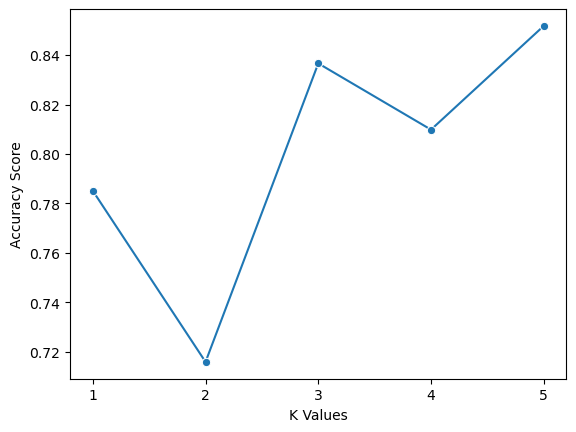

In [122]:
# Searching for the best number of neighbors 

from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,6)]
scores = []

X_scaled_train = scaler.fit_transform(X_scaled_train)

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_k, X_scaled_train, y_scaled_train, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [123]:
acc_scores = pd.DataFrame({'n_neighbors': [1, 2, 3, 4, 5],
                           
                          'Accuracy': [scores[0],
                                       scores[1],
                                       scores[2],
                                       scores[3],
                                       scores[4],
                                                                             
                                      ]})

acc_scores.style.hide_index()

n_neighbors,Accuracy
1,0.785101
2,0.715929
3,0.836633
4,0.809836
5,0.851781


In [124]:
# Gread Search Cross Validation for the best hyperparameters

from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, n_jobs = -1)

In [125]:
# Fitting the model on the train set

g_res = gs.fit(X_scaled_train, y_scaled_train)

In [126]:
# Finding the best score

g_res.best_score_

0.852787543485856

In [127]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [128]:
# Checking the data balance and confusion matrix

knn_5 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_5.fit(X_scaled_train, y_scaled_train)

KNeighborsClassifier(metric='manhattan')

In [129]:
y_pred5 = knn_5.predict(X_scaled_test)
count_y_pred5 = np.unique(y_pred5, return_counts=True)
count_y_pred5

(array([0, 1], dtype=int64), array([ 248, 8693], dtype=int64))

In [130]:
matrix_k5 = confusion_matrix(y_scaled_test, y_pred5)
matrix_k5

array([[  62, 1161],
       [ 186, 7532]], dtype=int64)

The high accuracy of this model is due to the very large number of true positive predictions. It is likely that the model will show positive loan capacity in most applications, which will be unfavorable for the loan company.

In [131]:
knn_4 = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn_4.fit(X_scaled_train, y_scaled_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [132]:
y_pred4 = knn_4.predict(X_scaled_test)
count_y_pred4 = np.unique(y_pred4, return_counts=True)
count_y_pred4

(array([0, 1], dtype=int64), array([ 817, 8124], dtype=int64))

In [133]:
matrix_k4 = confusion_matrix(y_scaled_test, y_pred4)
matrix_k4

array([[ 160, 1063],
       [ 657, 7061]], dtype=int64)

In [134]:
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_3.fit(X_scaled_train, y_scaled_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [135]:
y_pred3 = knn_3.predict(X_scaled_test)
count_y_pred3 = np.unique(y_pred3, return_counts=True)
count_y_pred3

(array([0, 1], dtype=int64), array([ 469, 8472], dtype=int64))

In [136]:
matrix_k3 = confusion_matrix(y_scaled_test, y_pred3)
matrix_k3

array([[ 103, 1120],
       [ 366, 7352]], dtype=int64)

For the model with 4 and 3 neighbors, the situation is similar to the model with 5 neighbors.

In [137]:
knn_2 = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn_2.fit(X_scaled_train, y_scaled_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [138]:
y_pred2 = knn_2.predict(X_scaled_test)
count_y_pred2 = np.unique(y_pred2, return_counts=True)
count_y_pred2

(array([0, 1], dtype=int64), array([2029, 6912], dtype=int64))

In [139]:
matrix_k2 = confusion_matrix(y_scaled_test, y_pred2)
matrix_k2

array([[ 377,  846],
       [1652, 6066]], dtype=int64)

In [140]:
knn_1 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_1 = knn_1.fit(X_scaled_train, y_scaled_train)

In [141]:
y_pred1 = knn_1.predict(X_scaled_test)
count_y_pred1 = np.unique(y_pred1, return_counts=True)
count_y_pred1

(array([0, 1], dtype=int64), array([1093, 7848], dtype=int64))

In [142]:
matrix_k1 = confusion_matrix(y_scaled_test, y_pred1)
matrix_k1

array([[ 228,  995],
       [ 865, 6853]], dtype=int64)

In [143]:
print(classification_report(y_scaled_test, y_pred1, zero_division=1))

knn_1_pr = evaluate(y_pred1, y_scaled_test)
knn_1_pr

              precision    recall  f1-score   support

           0       0.21      0.19      0.20      1223
           1       0.87      0.89      0.88      7718

    accuracy                           0.79      8941
   macro avg       0.54      0.54      0.54      8941
weighted avg       0.78      0.79      0.79      8941



{'f1-score': 0.88, 'accuracy': 0.79}

For n_neighbors = 2 are more true negative (TN) answers and fewer true positive (TP) answers than for n_neighbors = 1. For n_neighbors = 2 the accuracy and f1_score were 0.72 and 0.83 and for n_neighbors = 1 the scores were 0.79 and 0.88 respectively. The KNN model with 1 neighbor was chosen as the final one after hyperparameters tuning.

In [144]:
y_proba = knn.predict_proba(X_scaled_test)[:, 1]
y_proba

array([1. , 1. , 1. , ..., 1. , 1. , 0.5])

Random prediction: ROC AUC=0.537
KNN model: ROC AUC=0.547


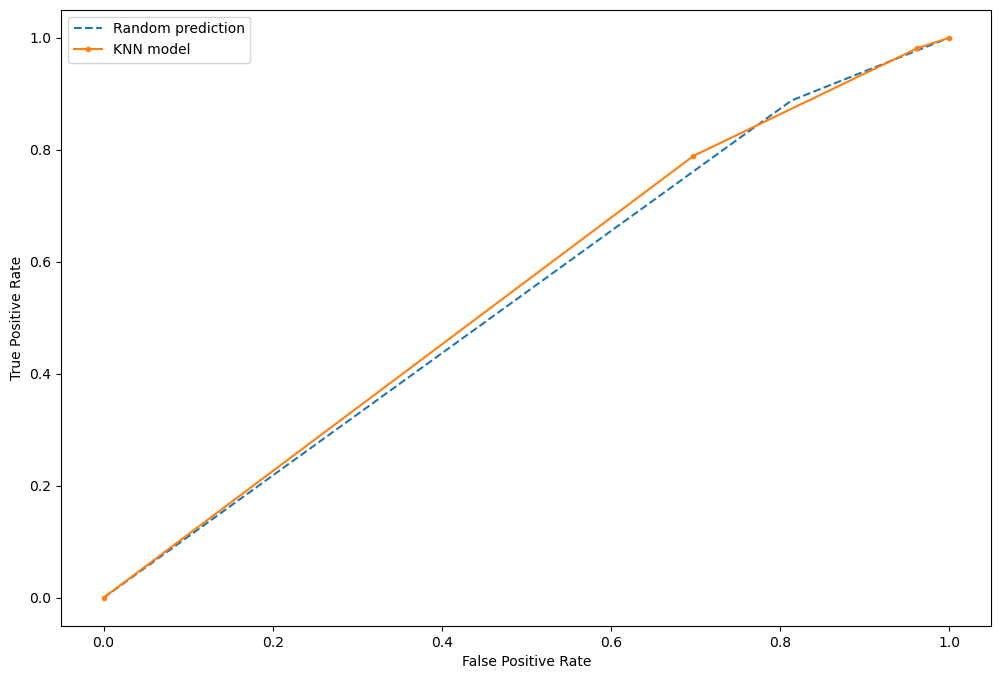

In [145]:
# Ploting the roc_curve and calculating the roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rp_auc = roc_auc_score(y_scaled_test, y_pred1)
rf_auc = roc_auc_score(y_scaled_test, y_proba)

# Summarizing scores
print('Random prediction: ROC AUC=%.3f' % (rp_auc))
print('KNN model: ROC AUC=%.3f' % (rf_auc))

# Calculating roc curves
rp_fpr, rp_tpr, _ = roc_curve(y_scaled_test, y_pred1)
rf_fpr, rf_tpr, _ = roc_curve(y_scaled_test, y_proba)

# Ploting the roc curve for the model
plt.figure(figsize=(12,8))
plt.plot(rp_fpr, rp_tpr, linestyle='--', label='Random prediction')
plt.plot(rf_fpr, rf_tpr, marker='.', label='KNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Prediction using the K Nearest Neighbors (KNN)

In [146]:
# Prediction of first 20 values

print('Predicted values:', y_pred1[0:20])
print('Real values: \n', y_scaled_test[:20]) 

Predicted values: [1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1]
Real values: 
 20997    1
31634    1
6752     1
37002    1
32877    1
12440    1
34024    1
34800    1
29966    1
30700    1
11424    1
22043    1
16176    1
2821     1
21136    1
32279    1
16999    1
19005    1
23849    1
36614    1
Name: loan_status, dtype: int64


In [147]:
print('Well-predicted values in testing:', (y_scaled_test == y_pred1).sum())
print('All values in testing part:', y_scaled_test.shape[0])
print()
print('Accuracy = Well-predicted values in testing part/ All values in testing part:', ((y_scaled_test == y_pred1).sum() / y_scaled_test.shape[0]).round(4))
print()
print('Accuracy with sklearn:', knn_1.score(X_scaled_test, y_scaled_test).round(4))

Well-predicted values in testing: 7081
All values in testing part: 8941

Accuracy = Well-predicted values in testing part/ All values in testing part: 0.792

Accuracy with sklearn: 0.792


## Trying out the model on selected data

In [148]:
# Correlation between loan_status and other features

df[df.columns[0:]].corr()['loan_status'][:].sort_values(key=abs, ascending=False)

loan_status                1.000000
int_rate                  -0.188825
sub_grade                 -0.180873
term                      -0.145288
fico_score                 0.121067
fico_class                 0.104426
revol_util                -0.099285
annual_inc                 0.069154
inq_last_6mths            -0.065797
loan_amnt                 -0.044783
verif_stat                -0.041387
dti                       -0.039065
home_ownership_RENT       -0.024496
home_ownership_MORTGAGE    0.024496
purpose                   -0.020486
geo_loc_ns                -0.020369
geo_loc                   -0.020039
open_acc                   0.020008
year_issue                -0.019037
month_issue               -0.018102
revol_bal                 -0.016391
emp_length                -0.016331
installment               -0.015473
month_ecl                  0.013544
geo_loc_we                -0.012037
delinq_2yrs               -0.008532
year_ecl                   0.007731
total_acc                 -0

In [149]:
# Selection of variables to test the model (based not on the correlation with loan_status)

new_X = df[['int_rate', 'sub_grade', 'term', 'fico_score', 'loan_amnt']].values
new_y = y

In [150]:
knn_1.fit(new_X, new_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [151]:
y_pred_new = knn_1.predict(new_X)

In [152]:
print(new_y[:20].values)
print(y_pred_new[:20])

[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1]
[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1]


In [153]:
knn_new_count = np.unique(y_pred_new, return_counts=True)
knn_new_count

(array([0, 1], dtype=int64), array([ 4039, 25763], dtype=int64))

In [154]:
matrix_new = confusion_matrix(new_y, y_pred_new)
matrix_new

array([[ 3338,   697],
       [  701, 25066]], dtype=int64)

In [155]:
print(classification_report(new_y, y_pred_new, zero_division=1))

knn_new_pr = evaluate(y_pred_new, new_y)
knn_new_pr

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4035
           1       0.97      0.97      0.97     25767

    accuracy                           0.95     29802
   macro avg       0.90      0.90      0.90     29802
weighted avg       0.95      0.95      0.95     29802



{'f1-score': 0.97, 'accuracy': 0.95}

In [156]:
# Enter the appropriate values to predict the probability that the loan will be repaid:

int_rate = float(input('Interest Rate on the loan: (5 - 25): '))
sub_grade = int(input('LC assigned loan subgrade (1 - 7 / 1: best): '))
term = int(input('The number of payments on the loan (36 or 60 months): '))
fico_score = int(input('FICO score (500 - 850): '))
loan_amnt = float(input('The listed amount of the loan applied for by the borrower (500 - 35000): '))

Interest Rate on the loan: (5 - 25): 15
LC assigned loan subgrade (1 - 7 / 1: best): 4
The number of payments on the loan (36 or 60 months): 60
FICO score (500 - 850): 670
The listed amount of the loan applied for by the borrower (500 - 35000): 25000


In [157]:
# Predicting whether the customer will pay off the loan (0 - No or 1 - Yes)

print(knn_1.predict([[int_rate, sub_grade, term, fico_score, loan_amnt]]))

[0]


# Conclusion

The project, which concerns predicting whether Lending Club clients will pay off their loans, has been divided into 4 parts: Data Processing, Exploratory Data Analysis, Feature Engineering, and Modeling. After a thorough cleaning of the data and the introduction of new ones, machine learning models were implemented. Six of them were tested: Decision Tree, Logistic Regression, Random Forest, Naive Bayes, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The three models gave similar accuracy and f1-score results (Random Forest, Logistic Regression and Support Vector Machine). Based on the prepared data, the these 3 models predicted that the vast majority of the potential borrowers would repay their loan. Such a solution would be useless for the lending company. The three other models showed similar results. Finally, the K Nearest Neighbors model (the best model) was used to predict whether borrowers would be able to repay their loans. The dependent variables correlated with the target (loan_status) were selected and the K Nearest Neighbors model was built only with them. By manually entering the selected 5 variables mentioned above, the model predicts whether the new borrower will be able to repay the loan or not.